In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import data_utils
import seaborn
seaborn.set()

def get_rmse(true_datasets, pred_datasets):
    sequence_length = 2000
    total_pred = 1000
    forget = 100
    n_simulations = len(true_datasets)
    input_samples_number = sequence_length - forget - total_pred
    rmse = np.zeros((input_samples_number, total_pred, n_simulations))
    for i in range(n_simulations):
        true_data = true_datasets[i]
        pred_output = predicted_datasets[i]
        for n_input in range(1, input_samples_number):
            for n_pred in range(1, total_pred):
                d1 = pred_output[n_input, 0:n_pred].flatten()
                d2 = true_data[:,forget+n_input:forget+n_input+n_pred,:].flatten()
                rmse[n_input, n_pred, i] = np.sqrt(np.sum((d1 - d2)**2)/n_pred)
    return rmse

def read_datasets(path, n_res=None, sample_numbers=None):
    true_datasets = {}
    predicted_datasets = {}
    for n_sample in range(sample_numbers):
        true_datasets[n_sample] = np.load(os.path.join(path, 'target_data_' + str(n_res) + '_' + str(n_sample) + '.npy'))
        predicted_datasets[n_sample] = np.load(os.path.join(path, 'predicted_data_' + str(n_res) + '_' + str(n_sample) + '.npy'))
    return true_datasets, predicted_datasets

In [ ]:
path = r'D:\Users\Mickael-manip\Desktop\JonMush\slm_experimental_datasets'

true_datasets, predicted_datasets = read_datasets(path, n_res=256, sample_numbers=8)
rmse_256 = get_rmse(true_datasets, predicted_datasets)

true_datasets, predicted_datasets = read_datasets(path, n_res=1024, sample_numbers=5)
rmse_1024 = get_rmse(true_datasets, predicted_datasets)

true_datasets, predicted_datasets = read_datasets(path, n_res=4096, sample_numbers=6)
rmse_4096 = get_rmse(true_datasets, predicted_datasets)

np.save(os.path.join(path, 'slm_rmse_256.npy'), rmse_256);
np.save(os.path.join(path, 'slm_rmse_1024.npy'), rmse_1024);
np.save(os.path.join(path, 'slm_rmse_4096.npy'), rmse_4096);

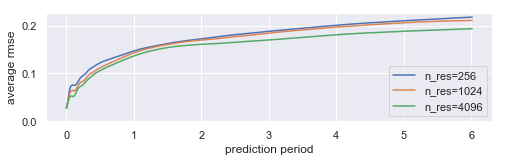

In [15]:
rmse_256 = np.load(os.path.join(path, 'slm_rmse_256.npy'));
rmse_1024 = np.load(os.path.join(path, 'slm_rmse_1024.npy'));
rmse_4096 = np.load(os.path.join(path, 'slm_rmse_4096.npy'));

plt.figure(1, figsize=(8,2))
plt.ylabel('average rmse')
plt.xlabel('prediction period')
plt.plot(np.array(range(0, 999))/166, np.mean(rmse_256[:,1:,:], axis=(0,2)), linewidth=1.5, label='n_res=256')
plt.plot(np.array(range(0, 999))/166, np.mean(rmse_1024[:,1:,:], axis=(0,2)), linewidth=1.5, label='n_res=1024')
plt.plot(np.array(range(0, 999))/166, np.mean(rmse_4096[:,1:,:], axis=(0,2)), linewidth=1.5, label='n_res=4096')
plt.legend()
plt.show;
plt.yticks([0, 0.1, 0.2])
plt.savefig(os.path.join(path, 'SLM_Nres_rmse.png'), bbox_inches='tight', dpi=400)

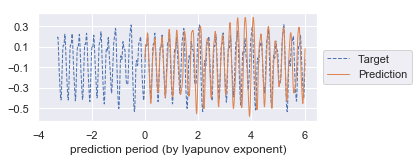

In [19]:
# Plotting different samples for one good example selection
# forget = 100
# true_data = true_datasets[1][:,forget:,:]
# pred_data = predicted_datasets[1]
# total_pred = 1000
# N = 1050
# for N in range(1050, 1250, 10):
#     plt.figure(N, figsize=(5,2))
#     plt.plot(np.squeeze(true_data[0, -N:-N+total_pred, 0]), label=N)
#     plt.plot(np.squeeze(pred_data[-N,:]))
#     plt.legend()

forget=100
total_pred = 1000
N = 1355
true_data = true_datasets[1][:,forget:,:]
pred_data = predicted_datasets[1]
plt.figure(N, figsize=(5,2))
plt.plot(np.array(range(-(1900-N), total_pred))/166, np.squeeze(true_data[0, :-N+total_pred, 0]), '--', linewidth=1.0, label='Target')
plt.plot(np.array(range(0, total_pred))/166, np.squeeze(pred_data[-N,:]), linewidth=1.0, label='Prediction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks([-0.5,-0.3,-0.1,0.1,0.3])
plt.xticks(np.arange(-4,8,2))
plt.xlabel('prediction period (by lyapunov exponent)')
plt.savefig(os.path.join(path, 'SLM_prediction_target_Nres=4096.png'), bbox_inches='tight', dpi=400)

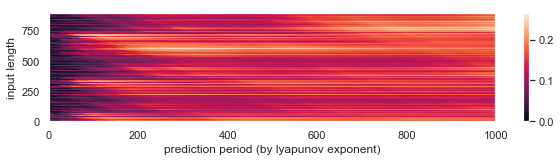

In [24]:
plt.figure(1, figsize=(10,2))
plt.ylabel('input length')
plt.xlabel('prediction period (by lyapunov exponent)')
im=plt.pcolormesh(rmse_4096[:,1:, 2])
plt.colorbar(im)
plt.show;

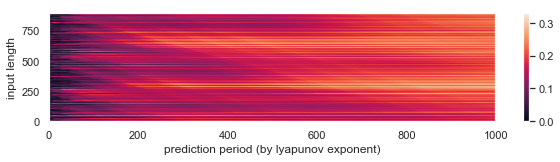

In [27]:
plt.figure(1, figsize=(10,2))
plt.ylabel('input length')
plt.xlabel('prediction period (by lyapunov exponent)')
im=plt.pcolormesh(rmse_1024[:,1:, 2])
plt.colorbar(im)
plt.show;

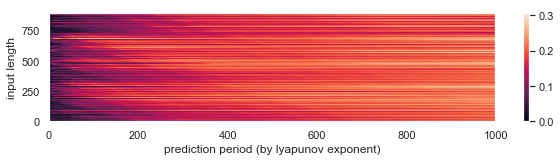

In [26]:
plt.figure(1, figsize=(10,2))
plt.ylabel('input length')
plt.xlabel('prediction period (by lyapunov exponent)')
im=plt.pcolormesh(rmse_256[:,1:, 2])
plt.colorbar(im)
plt.show;